# 5장 선형 회귀 모델: 먼저 긋고 수정하기

- 기울기 $a$와 오차는 이차 함수 관계
    - 기울기가 무한대로 커지거나 무한대로 작아지면, 오차도 무한대로 커짐
    - 이차 함수 그래프의 가장 아래쪽 볼록한 부분이 오차가 가장 작을 때
- 경사 하강법(gradient decent): 미분 기울기를 이용하여 오차를 최소화하는 최적의 기울기를 찾는 방법

## 1. 경사 하강법의 개요

- 오차를 최소화하는 기울기 $m$에서의 기울기는 $x$축과 평행한 선, 즉 기울기는 0
- 경사 하강법은 반복적으로 기울기 $a$를 변화시켜 최적의 $m$ 값을 찾아내는 방법
    1. $a_{1}$에서 미분을 구한다.
    2. 구한 기울기의 반대 방향(기울기가 +면 음의 방향, -면 양의 방향)으로 얼마간 이동시킨 $a_{2}$에서 미분을 구한다.
    3. 앞에서 구한 미분 값이 0이 아니면 1과 2 과정을 반복한다.
- 학습률(learning rate): 2에서 이동시킬 때의 이동 거리 기준
    - 학습률을 너무 크게 잡으면 한 점으로 수렴하지 않고 발산
    - 학습률을 너무 작게 잡으면 수렴할 때까지의 반복 횟수가 길어짐

## 2. 파이썬 코딩으로 확인하는 선형 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt

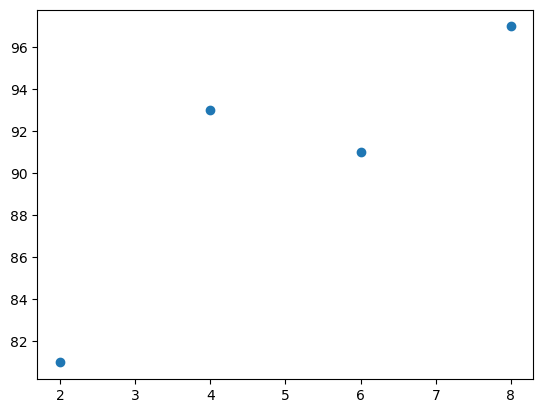

In [2]:
# 공부 시간 x와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

In [3]:
# 기울기 a의 값과 절편 b의 값을 초기화합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다.
epochs = 2001

# x 값이 총 몇 개인지 셉니다.
n = len(x)

In [4]:
# 경사 하강법을 시작합니다.
for i in range(epochs):  # 에포크 수만큽 반복합니다.
    y_pred = a * x + b  # 예측 값을 구하는 식입니다.
    error = y - y_pred  # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2 / n) * sum(-x * error)  # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2 / n) * sum(-(error))  # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff  # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff  # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:  # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


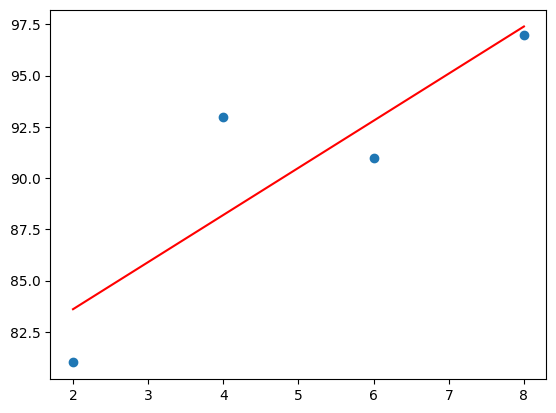

In [5]:
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입해 그래프를 그립니다.
y_pred = a * x + b

# 그래프를 출력합니다.
plt.scatter(x, y)
plt.plot(x, y_pred, "r")
plt.show()

## 3. 다중 선형 회귀의 개요

- 다중 선형 회귀: 여러 개의 독립 변수를 사용한 선형 회귀
    - $y = a_1 x_1 + a_2 x_2 + b$

## 4. 파이썬 코딩으로 확인하는 다중 선형 회귀

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 공부 시간 x1과 과외 시간 x2, 성적 y의 넘파이 배열을 만듭니다.
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97])

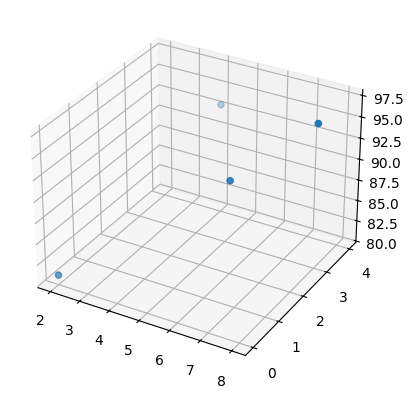

In [8]:
# 데이터의 분포를 그래프로 나타냅니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter3D(x1, x2, y)
plt.show()

In [9]:
# 기울기 a의 값과 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

# 학습률을 정합니다.
lr = 0.01

# 몇 번 반복될지 설정합니다.
epochs = 2001

# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다.
n = len(x1)

In [10]:
# 경사 하강법을 시작합니다.
for i in range(epochs):  # 에포크 수만큼 반복합니다.
    y_pred = a1 * x1 + a2 * x2 + b  # 예측 값을 구하는 식을 세웁니다.
    error = y - y_pred  # 실제 값과 비교한 오차를 error로 놓습니다.

    a1_diff = (2 / n) * sum(-x1 * error)  # 오차 함수를 a1로 편미분한 값입니다.
    a2_diff = (2 / n) * sum(-x2 * error)  # 오차 함수를 a2로 편미분한 값입니다.
    b_diff = (2 / n) * sum(-(error))  # 오차 함수를 b로 편미분한 값입니다.

    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff  # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:  # 100번 반복될 때마다 현재의 a1, a2, b의 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [11]:
# 실제 점수와 예측된 점수를 출력합니다.
print("실제 점수:", y)
print("예측 점수:", y_pred)

실제 점수: [81 93 91 97]
예측 점수: [80.76387645 92.97153922 91.42520875 96.7558749 ]


## 5. 텐서플로에서 실행하는 선형 회귀, 다중 선형 회귀 모델

- $y = ax + b \Rightarrow H(x) = wx + b$
    - 가설 함수(hypothesis): 문제를 해결하기 위해 가정하는 식
        - 선형 회귀에서 $y = ax + b$
        - 머신 러닝에서는 $H(x)$로 표기
    - 가중치(weight): 변수 $x$에 어느 정도로 곱하는지를 결정하는 가중치
        - 선형 회귀에서 기울기 $a$
        - 머신 러닝에서는 $w$로 표기
    - 편향(bias): 데이터의 특성에 따라 따로 부여되는 값
        - 선형 회귀에서 $y$ 절편 $b$
- 손실 함수(loss function): 실제 값과 예측 값 사이의 오차에 대한 식
    - 평균 제곱 오차
- 옵티마이저(optimizer): 최적의 기울기와 절편을 찾기 위한 방법
    - 경사 하강법

### 텐서플로에서 실행하는 선형 회귀

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [13]:
model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정합니다.
model.add(Dense(1, input_dim=1, activation="linear"))

# 오차 수정을 위해 경사 하강법(sgd)을,
# 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다.
model.compile(optimizer="sgd", loss="mse")

# 오차를 최소화하는 과정을 2000번 반복합니다.
model.fit(x, y, epochs=2000)

Epoch 1/2000


c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 9145.3398
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2172.1406
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1142.6305
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 986.1343
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 957.8961
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 948.5300
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 941.9694
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 935.8544
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 929.8383
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 923.8699
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 917.9412
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 912.0513
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 906.1996
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 900.3855
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


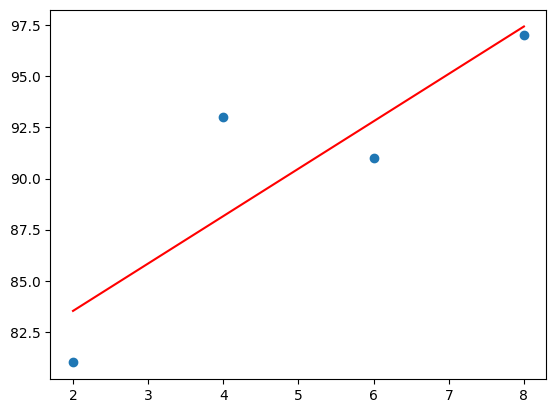

In [14]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), "r")  # 예측 결과를 그래프로 나타냅니다.
plt.show()

In [15]:
import tensorflow as tf

# 임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
input_data = tf.constant([hour])
prediction = model.predict(input_data)[0][0]
print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다." % (hour, prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다.


### 텐서플로에서 실행하는 다중 선형 회귀

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

In [17]:
model = Sequential()

# 입력 변수가 두 개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다.
model.add(Dense(1, input_dim=2, activation="linear"))
model.compile(optimizer="sgd", loss="mse")

model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 8137.6851
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1432.9476
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 955.9357
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 916.9540
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 908.8138
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 902.8778
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 897.1319
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 891.4337
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 885.7731
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 880.1492
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 874.5616
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 869.0100
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 863.4943
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 858.0140
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [18]:
import tensorflow as tf

# 임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
private_class = 4
input_data = tf.constant([[hour, private_class]])
prediction = model.predict(input_data)[0][0]
print(
    "%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다."
    % (hour, private_class, prediction)
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다.
